Ever wondered how you have fared in the Kaggle over time? 

This kernel is to look at the kaggle journey of you (and probably the people whom we silently stalk at) and understand more about the journey !

Please enter the `username` of the person in the below cell and execute the notebook to look at the journey.

In [1]:
import os
import string
import datetime
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

print(os.listdir("../input"))

['UserOrganizations.csv', 'KernelTags.csv', 'Kernels.csv', 'KernelVersions.csv', 'DatasourceObjects.csv', 'Tags.csv', 'UserAchievements.csv', 'ForumTopics.csv', 'Teams.csv', 'ForumMessages.csv', 'Datasources.csv', 'DatasetVotes.csv', 'CompetitionTags.csv', 'KernelVersionDatasetSources.csv', 'Organizations.csv', 'DatasourceVersionObjectTables.csv', 'DatasetVersions.csv', 'Datasets.csv', 'KernelVotes.csv', 'KernelLanguages.csv', 'Forums.csv', 'KernelVersionOutputFiles.csv', 'ForumMessageVotes.csv', 'KernelVersionKernelSources.csv', 'UserFollowers.csv', 'DatasetTags.csv', 'KernelVersionCompetitionSources.csv', 'Users.csv', 'TeamMemberships.csv', 'Competitions.csv', 'Submissions.csv']


In [2]:
### Enter the user name here ###
user_name = "tunguz"

In [3]:
users_df = pd.read_csv("../input/Users.csv")
user_df = users_df[users_df["UserName"]==user_name]
user_id = user_df["Id"].values[0]
user_display = user_df["DisplayName"].values[0]
print("The user id for the given user name is : ",user_id)
print("The display name for the given user name is : ",user_display)

The user id for the given user name is :  417337
The display name for the given user name is :  Bojan Tunguz


## Competitions Journey

In [4]:
team_members_df = pd.read_csv("../input/TeamMemberships.csv")
team_df = pd.read_csv("../input/Teams.csv")
comp_df = pd.read_csv("../input/Competitions.csv")

temp_df = team_members_df[team_members_df["UserId"]==user_id]
temp_df = pd.merge(temp_df, team_df, left_on="TeamId", right_on="Id", how="left")
temp_df = pd.merge(temp_df, comp_df, left_on="CompetitionId", right_on="Id", how="left")
temp_df["DeadlineDate"] = pd.to_datetime(temp_df["DeadlineDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["DeadlineYear"] = temp_df["DeadlineDate"].dt.year
temp_df["DeadlineDate"] = temp_df["DeadlineDate"].apply(lambda x: datetime.date(x.year,x.month,1))

temp_df = temp_df[~np.isnan(temp_df["PrivateLeaderboardRank"])]
temp_df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,Id_x,TeamId,UserId,RequestDate,Id_y,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,DeadlineYear
0,245724,217811,417337,09/15/2015,217811,4488,417337.0,Bojan Tunguz,10/12/2015,10/12/2015,2029965.0,2029965.0,False,3.0,07/15/2016,89.0,82.0,4488,flavours-of-physics,Flavours of Physics: Finding τ → μμμ,Identify a rare decay phenomenon,Featured,764.0,NaN,1,CERN/Yandex,07/20/2015 22:50:02,2015-10-01,10/05/2015 23:59:00,10/05/2015 23:59:00,11/30/2015 23:59:00,NaN,True,True,False,True,1,NaN,CernWeightedAuc,"Weighted AUC, with agreement check and correla...",Weighted Area Under Receiver Operating Charact...,True,Predicted Probability,"[0,1]",5,2,4.0,False,True,False,False,USD,15000.0,3,1.0,True,673,706,10124,2015
1,246256,218347,417337,09/17/2015,218347,4481,417337.0,Bojan Tunguz,09/29/2015,09/29/2015,1991779.0,1991779.0,False,NaN,NaN,220.0,224.0,4481,coupon-purchase-prediction,Coupon Purchase Prediction,Predict which coupons a customer will buy,Featured,761.0,1022.0,1,Recruit,07/16/2015 00:45:00,2015-09-01,09/23/2015 23:59:00,09/23/2015 23:59:00,10/30/2015 23:59:00,NaN,True,True,False,True,30,NaN,MAP@{K},NaN,Mean Average Precision at K,True,Predicted Probability,"[0,1]",5,2,NaN,False,True,False,False,USD,50000.0,3,1.0,True,1076,1192,18477,2015
2,246502,218587,417337,09/18/2015,218587,4487,417337.0,Bojan Tunguz,09/19/2015,10/11/2015,1961744.0,1961744.0,False,NaN,NaN,573.0,584.0,4487,springleaf-marketing-response,Springleaf Marketing Response,Determine whether to send a direct mail piece ...,Featured,771.0,NaN,1,Springleaf,08/14/2015 14:23:08,2015-10-01,10/12/2015 23:59:00,10/12/2015 23:59:00,11/12/2015 23:59:00,NaN,True,True,False,True,30,NaN,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,Predicted Probability,"[0,1]",5,2,NaN,False,True,False,False,USD,100000.0,5,1.0,True,2226,2508,39439,2015
3,246557,218648,417337,09/18/2015,218648,4493,417337.0,Bojan Tunguz,09/18/2015,09/26/2015,1983556.0,1960743.0,False,NaN,NaN,218.0,233.0,4493,dato-native,Truly Native?,Predict which web pages served by StumbleUpon ...,Featured,767.0,NaN,1,Dato,08/06/2015 21:33:47,2015-10-01,10/07/2015 23:59:00,10/07/2015 23:59:00,11/21/2015 23:59:00,NaN,True,True,False,True,40,NaN,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,Predicted Probability,"[0,1]",3,2,NaN,False,True,False,False,USD,10000.0,1,1.0,True,274,426,3224,2015
4,247468,219552,417337,09/22/2015,219552,4521,417337.0,Bojan Tunguz,09/22/2015,09/22/2015,1969980.0,1969980.0,False,NaN,NaN,299.0,297.0,4521,noaa-right-whale-recognition,Right Whale Recognition,Identify endangered right whales in aerial pho...,Research,782.0,22.0,1,NOAA,08/27/2015 22:57:00,2016-01-01,12/31/2015 23:59:00,12/31/2015 23:59:00,02/07/2016 23:59:00,NaN,True,True,False,True,35,NaN,MulticlassLoss,Multiclass Loss,Negative log likelihood divided by the number ...,False,Predicted Probability,"[0,1]",5,2,NaN,False,True,False,False,USD,10000.0,3,1.0,True,364,474,4789,2016


In [8]:
def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_df = temp_df.groupby('DeadlineYear')['PrivateLeaderboardRank'].agg(["size", "mean", "min"])
cnt_srs = cnt_df["size"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="green",
    ),
)

layout = go.Layout(
    title='Count of competitions over years',
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")


### Mean Private Rank ###
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="blue",
    ),
)

layout = go.Layout(
    title='Mean Rank over years',
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")



### Best rank each year ###
cnt_srs = cnt_df["min"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="red",
    ),
)

layout = go.Layout(
    title='Best Rank in each year',
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

In [7]:
#temp_df["Medal"].value_counts()

cnt_df = temp_df.pivot_table(index="DeadlineYear", columns="Medal", values="PrivateLeaderboardRank", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(
            color=color,
        ),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Competition Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [9]:
cnt_srs = temp_df["HostSegmentTitle"].value_counts()

labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Competition Type Distribution',
    font=dict(size=14),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [10]:
comp_tags_df = pd.read_csv("../input/CompetitionTags.csv")
tags_df = pd.read_csv("../input/Tags.csv")
cnt_df = pd.merge(temp_df[["CompetitionId"]], comp_tags_df, on="CompetitionId", how="inner")
cnt_df = pd.merge(cnt_df, tags_df, left_on="TagId", right_on="Id", how="inner")
cnt_df["Name"].value_counts()

def bar_chart(cnt_srs, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = cnt_df["Name"].value_counts().head(10)
traces = [bar_chart(cnt_srs, "orange")]
layout = go.Layout(
    title='Data type of competitions',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [11]:
cnt_srs = temp_df["TeamName"].value_counts().head(5)
traces = [bar_chart(cnt_srs, "blue")]
layout = go.Layout(
    title='Favorite Team Name',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [12]:
temp_df = team_members_df[team_members_df["UserId"]==user_id]
temp_df = pd.merge(team_members_df, temp_df, on="TeamId", how="inner", suffixes=('', '_y'))
temp_df = temp_df[temp_df["UserId"]!=user_id]
temp_df = pd.merge(temp_df, users_df, left_on="UserId", right_on="Id", how="left")

cnt_srs = temp_df["DisplayName"].value_counts().head(7)
traces = [bar_chart(cnt_srs, "green")]
layout = go.Layout(
    title='Number of competitions with favorite team members ',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Kernels Journey

In [13]:
kernels_df = pd.read_csv("../input/Kernels.csv")
temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
temp_df["MadePublicDate"] = pd.to_datetime(temp_df["MadePublicDate"], format="%m/%d/%Y")
temp_df["MadePublicYear"] = temp_df["MadePublicDate"].dt.year
temp_df.head()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes,MadePublicYear
4706,18064,417337,75825.0,20180.0,NaN,73611.0,09/24/2015 00:58:47,09/26/2015,2015-09-24,False,pca-svm1,NaN,NaN,494,0,2,2015
5128,19193,417337,83410.0,81355.0,16921.0,82141.0,10/07/2015 16:18:19,10/09/2015,2015-10-07,False,h2o-starter-gbm-lr-015-cut-70,NaN,NaN,1517,4,2,2015
5195,19425,417337,83431.0,83366.0,NaN,83415.0,10/09/2015 14:56:12,10/09/2015,2015-10-09,False,agreement-correlation-and-roc,NaN,NaN,288,0,2,2015
5210,19455,417337,86889.0,83496.0,16978.0,83651.0,10/10/2015 00:09:20,10/14/2015,2015-10-10,False,gbm-inches-only,3.0,07/15/2016,4644,12,10,2015
5291,19663,417337,85149.0,84690.0,NaN,85149.0,10/12/2015 02:27:07,10/12/2015,2015-10-12,False,ensemble-boost-3,NaN,NaN,122,0,0,2015


In [14]:
# Number of kernels
cnt_srs = temp_df["MadePublicYear"].value_counts()
traces = [bar_chart(cnt_srs, "blue")]
layout = go.Layout(
    title='Number of kernels in each year',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')


# Number of views
cnt_srs = temp_df.groupby("MadePublicYear")["TotalViews"].mean()
traces = [bar_chart(cnt_srs, "green")]
layout = go.Layout(
    title='Mean number of views per kernel',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

# Number of votes
cnt_srs = temp_df.groupby("MadePublicYear")["TotalVotes"].mean()
traces = [bar_chart(cnt_srs, "red")]
layout = go.Layout(
    title='Mean number of votes per kernel',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [15]:
cnt_df = temp_df.pivot_table(index="MadePublicYear", columns="Medal", values="AuthorUserId", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(
            color=color,
        ),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Kernel Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [16]:
temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
kernel_tags_df = pd.read_csv("../input/KernelTags.csv")
temp_df = pd.merge(temp_df, kernel_tags_df, left_on="Id", right_on="KernelId", how="inner")
temp_df = pd.merge(temp_df, tags_df, left_on="TagId", right_on="Id", how="inner")

cnt_srs = temp_df["Name"].value_counts().head(10)
traces = [bar_chart(cnt_srs, "orange")]
layout = go.Layout(
    title='Tag count of the kernels',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Discussion Journey

In [23]:
#temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
forum_message_df = pd.read_csv("../input/ForumMessages.csv")
temp_df = forum_message_df[forum_message_df["PostUserId"]==user_id]
temp_df["PostDate"] = pd.to_datetime(temp_df["PostDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["PostYear"] = temp_df["PostDate"].dt.year
temp_df.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate,PostYear
83346,103159,18107,417337,2015-12-29 15:05:08,NaN,<p>[quote=Kele XU;102976]</p>\n\n<p>You can re...,NaN,NaN,2015
84427,114177,20008,417337,2016-04-08 00:08:01,NaN,<p>Here is the link to the ResNet model that I...,3.0,07/15/2016,2016
90992,117660,20446,417337,2016-04-30 02:25:02,NaN,<p>[quote=Jonathan Chung;117581]</p>\n\n<p>An ...,NaN,NaN,2016
91385,117730,20336,417337,2016-04-30 15:41:39,NaN,<p>[quote=SecondPlan;116753]</p>\n\n<p>Pre-tra...,NaN,NaN,2016
91421,117739,20336,417337,2016-04-30 16:23:29,NaN,<p>Here is a good example of extracting featur...,2.0,07/15/2016,2016


In [22]:
# Number of kernels
cnt_srs = temp_df["PostYear"].value_counts()
traces = [bar_chart(cnt_srs, "blue")]
layout = go.Layout(
    title='Number of forum posts in each year',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [24]:
cnt_df = temp_df.pivot_table(index="PostYear", columns="Medal", values="PostUserId", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(
            color=color,
        ),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Discussion Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

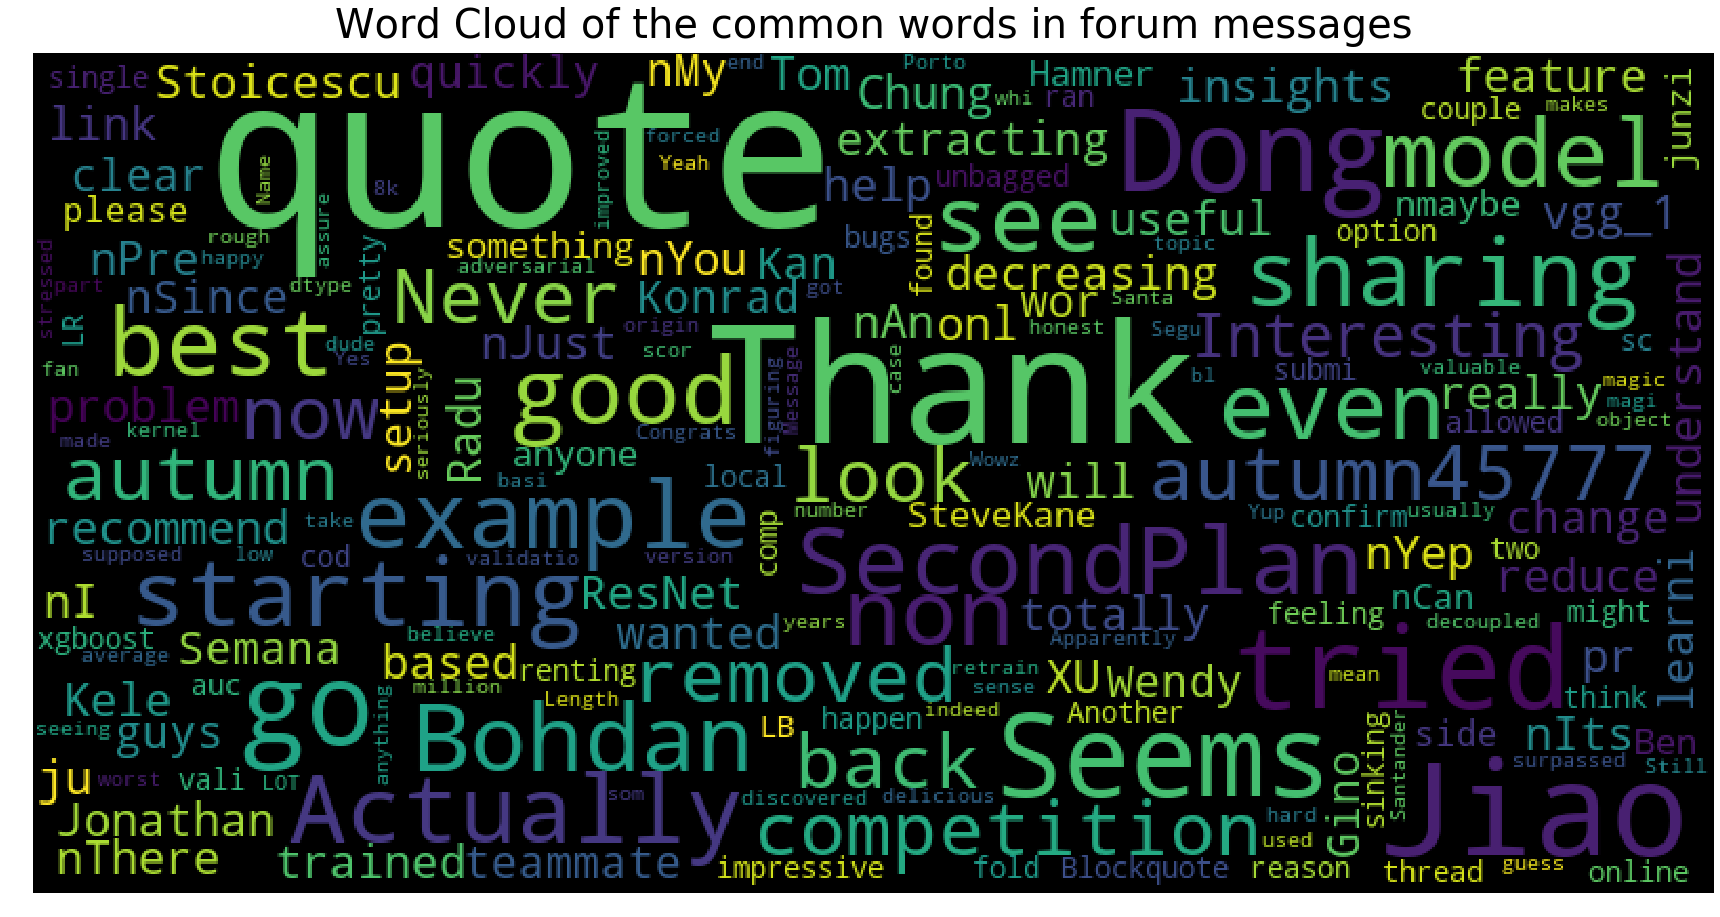

In [27]:
import re
def clean_string(txt):
    txt = str(txt)
    txt = re.sub("<.*?>", "", txt)
    txt = re.sub(' +', ' ', txt)
    return txt

temp_df["Message"] = temp_df["Message"].apply(lambda x: clean_string(x))
#temp_df.head()

from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(temp_df["Message"], title="Word Cloud of the common words in forum messages")

### More to come. Stay tuned!

Some of the ideas are
* Kagglers who upvote your kernels
* Kagglers who upvote your forum posts
* Number of followers over time